# The first step is the preprocessing

 We import the needed libraries :


In [32]:
import os
import matplotlib.pyplot as plt
import numpy as np
import regex as re
from nltk import tokenize, stem, corpus, download
from charset_normalizer import from_path

We create a methode for loading the data, the methode will return a list containing the contents of each file

In [2]:
def load_data(path) :
    data = []
    files = os.listdir(path)
    for file in files :
        f = open(path+file,encoding="ISO-8859-1")
        data.append(f.read())
        f.close()
    return data

We call this methode on the 3 directories that are contained in our dataset

In [3]:
spam = load_data(r'C:\Users\Fayçal\OneDrive\Bureau\SII\S2\AARN\TP\Project\spam_2\spam_2/')
ham = load_data(r'C:\Users\Fayçal\OneDrive\Bureau\SII\S2\AARN\TP\Project\hard_ham\hard_ham/') + load_data(r'C:\Users\Fayçal\OneDrive\Bureau\SII\S2\AARN\TP\Project\easy_ham\easy_ham/')

print( 'There are ' + str(len(spam))+' Spam emails in the dataset')
print( 'There are ' + str(len(ham))+' Legitimate emails in the dataset')

There are 1396 Spam emails in the dataset
There are 2801 Legitimate emails in the dataset


Here is a visualization of the data

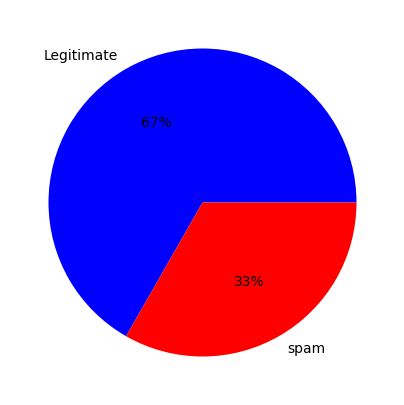

In [4]:
data = [len(ham)/len(ham+spam), len(spam)/len(ham+spam)]
labels = ['Legitimate', 'spam']
colors = ['blue', 'red']
plt.figure(figsize=(12, 5))
plt.pie(data, labels = labels, autopct='%.0f%%', colors=colors)
plt.show()

We take a look at a random email to see its structure :

In [9]:
import random
print(random.choice(spam))

From cvru@hotmail.com  Mon Jun 24 17:06:48 2002
Return-Path: cvru@hotmail.com
Delivery-Date: Mon May 27 11:44:59 2002
Received: from mandark.labs.netnoteinc.com ([213.105.180.140]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g4RAiwe07298 for
    <jm@jmason.org>; Mon, 27 May 2002 11:44:58 +0100
Received: from mail.dxr.com.cn ([218.22.96.3]) by
    mandark.labs.netnoteinc.com (8.11.2/8.11.2) with ESMTP id g4RAis724407 for
    <jm@netnoteinc.com>; Mon, 27 May 2002 11:44:56 +0100
Received: from . [211.21.63.70] by mail.dxr.com.cn with ESMTP
    (SMTPD32-7.05) id ACF51005A; Mon, 27 May 2002 18:39:49 +0800
Message-Id: <000006fb15b6$0000387d$0000462d@.>
To: <jbytes@usa.net>, <j47b@aol.com>
Cc: <yyyy@netnoteinc.com>, <kustaava@hotmail.com>
From: cvru@hotmail.com
Subject: Lose 20 Pounds In 10 Days                  27540
Date: Mon, 27 May 2002 06:53:41 -1600
MIME-Version: 1.0
Reply-To: cvru@hotmail.com
X-Keywords: 
Content-Type: text/html; charset="iso-8859-1"
Content-Transfer-Encod

We start cleaning the files to get a clear text

In [137]:
def clean_email(path):

    patterns = {
        r"<(.|\n)+?>": " ",  # Regex balise HTML
        r"^\s*(To:|From:|Subject:|Date:|Content\W(.*?):)" : " ", #Regex mot cles d'un email (subjec, to, from ...etc)
    }
    combined_pattern = re.compile("|".join(patterns.keys()))  # Combine all patterns into one regex pattern

    tokensList = []
    fileName = path.split('/')[-1]
    encoding = from_path(fileName).best().encoding

    with open(fileName, "r", encoding=encoding) as email:
        content = ''.join(line for line in email if not re.search(combined_pattern, line))

    return content


We print the cleaned email to inspect the content :

In [138]:
# This is a random file used as an example
print(clean_email(r'C:\Users\Fayçal\OneDrive\Bureau\SII\S2\AARN\TP\Project\spam_2\spam_2\00013.372ec9dc663418ca71f7d880a76f117a'))

From zonepost11@freemail.hu  Wed Aug  1 23:31:50 2001
Delivered-To: yyyy@netnoteinc.com
Received: from mailman.accessonline.com.au (alex-wg.accessonline.com.au
    [203.42.79.4]) by mail.netnoteinc.com (Postfix) with ESMTP id 83A29114088
Received: from webman.accessonline.com.au ([203.42.79.8]) by
    mailman.accessonline.com.au with SMTP (Microsoft Exchange Internet Mail
    Service Version 5.5.2650.21) id QCJTFPZ2; Thu, 2 Aug 2001 07:55:12 +1000
Received: from 64.3.210.238 - 64.3.210.238 by webman.accessonline.com.au
    with Microsoft SMTPSVC(5.5.1774.114.11); Thu, 2 Aug 2001 07:53:02 +1000
MIME-Version: 1.0
X-Priority: 3
X-Msmail-Priority: Normal



China's rapid economic growth, as ranked by the World Bank, is TEN TIMES 
FASTER than the world economy. 

The only thing US investors should be asking themselves is, "How can I 
participate in this explosion?" We have the answer. Texas-based 
CommunicateNow.com, Inc. (OTC BB trading symbol: CMNW) may unlock 
China's amazing potential.


Now we have to do the preprocessing of the email and tokenize it :

In [152]:
def preprocess(path):

    adressReg = r"\b[\w-]+@[\w-]+\.[A-Za-z]\b" #Regex adress email
    urlReg = r"https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)" #Regex URL

    clearTextEmail = clean_email(path)
    clearTextEmail = re.sub(adressReg, " emailaddr ", clearTextEmail)
    clearTextEmail = re.sub(urlReg, " httpaddr ", clearTextEmail)
    clearTextEmail = re.sub(r"\d+", " number " , clearTextEmail)
    clearTextEmail = re.sub(r"$", " dollar ", clearTextEmail)

    tokenizer = tokenize.TreebankWordTokenizer()
    tokens = tokenizer.tokenize(clearTextEmail)

    stemmer = stem.SnowballStemmer("english")
    tokens = [stemmer.stem(token) for token in tokens if token.isalpha()]


    return tokens

We run on an example :

In [153]:
# This is a random file used as an example
print(preprocess(r'spam_2\spam_2\00013.372ec9dc663418ca71f7d880a76f117a'))

['from', 'zonepost', 'number', 'wed', 'aug', 'number', 'number', 'number', 'number', 'number', 'yyyi', 'receiv', 'from', 'number', 'number', 'number', 'number', 'by', 'postfix', 'with', 'esmtp', 'id', 'number', 'a', 'number', 'receiv', 'from', 'number', 'number', 'number', 'number', 'by', 'with', 'smtp', 'microsoft', 'exchang', 'internet', 'mail', 'servic', 'version', 'number', 'number', 'number', 'number', 'id', 'qcjtfpz', 'number', 'thu', 'number', 'aug', 'number', 'number', 'number', 'number', 'number', 'receiv', 'from', 'number', 'number', 'number', 'number', 'number', 'number', 'number', 'number', 'by', 'with', 'microsoft', 'smtpsvc', 'number', 'number', 'number', 'number', 'number', 'thu', 'number', 'aug', 'number', 'number', 'number', 'number', 'number', 'number', 'number', 'number', 'normal', 'china', 'rapid', 'econom', 'growth', 'as', 'rank', 'by', 'the', 'world', 'bank', 'is', 'ten', 'time', 'faster', 'than', 'the', 'world', 'the', 'onli', 'thing', 'us', 'investor', 'should',

First we load the path names of each of our dataset files into another file

In [154]:
import os

def extract_filenames_to_txt(directory_path, output_file_path,open_mode):
    with open(output_file_path, open_mode) as output_file:
        for filename in os.listdir(directory_path):
            if os.path.isfile(os.path.join(directory_path, filename)):
                output_file.write(directory_path+'\\'+ filename + '\n')


In [155]:
extract_filenames_to_txt(r'spam_2\spam_2',r'pathFiles\spamPaths.txt','w')

extract_filenames_to_txt(r'easy_ham\easy_ham',r'pathFiles\hamPaths.txt','w')

extract_filenames_to_txt(r'hard_ham\hard_ham',r'pathFiles\hamPaths.txt','a')

Now we use those path files to do the preprocessing :

In [157]:
spamPaths = open(r'pathFiles\spamPaths.txt', 'r')
hamPaths = open(r'pathFiles\hamPaths.txt', 'r')

spamTokens = []
hamTokens = []

for path in spamPaths.readlines():
    path = path.strip()
   # print(path)
    spamTokens = spamTokens + preprocess(path)

for path in hamPaths.readlines():
    path = path.strip()
   # print(path)
    hamTokens = hamTokens + preprocess(path)


print(len(spamTokens))
print(len(hamTokens))


774543
1167846


In [160]:
print(hamTokens[:100])

['from', 'thu', 'aug', 'number', 'number', 'number', 'number', 'number', 'zzzz', 'receiv', 'from', 'localhost', 'localhost', 'number', 'number', 'number', 'number', 'by', 'postfix', 'with', 'esmtp', 'id', 'd', 'number', 'e', 'number', 'c', 'number', 'receiv', 'from', 'phobo', 'number', 'number', 'number', 'number', 'by', 'localhost', 'with', 'imap', 'number', 'number', 'number', 'for', 'zzzz', 'localhost', 'thu', 'number', 'aug', 'number', 'number', 'number', 'number', 'number', 'ist', 'receiv', 'from', 'number', 'number', 'number', 'number', 'by', 'number', 'number', 'number', 'number', 'number', 'number', 'with', 'esmtp', 'id', 'g', 'number', 'mbyrz', 'number', 'for', 'receiv', 'from', 'number', 'number', 'number', 'number', 'by', 'postfix', 'with', 'esmtp', 'id', 'number', 'thu', 'number', 'aug', 'number', 'number', 'number', 'number', 'number', 'edt', 'receiv', 'from', 'number', 'number']
